In [108]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [109]:
df = pd.read_csv('diabetes.csv')
# 판다스에서 numpy로 변경
np_arr = df.to_numpy()
df
# type(np_arr) 
# type(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df['SkinThickness']<5
# df[df['SkinThickness']==0]['SkinThickness']

0      False
1      False
2       True
3      False
4      False
       ...  
763    False
764    False
765    False
766     True
767    False
Name: SkinThickness, Length: 768, dtype: bool

In [129]:
values = df['Outcome'].value_counts()
values

Outcome
0    500
1    268
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x255c93d2f60>,
 [Text(-1.0229434539383377, -0.5254395208249035, '당뇨병이 아닌환자'),
  Text(0.9784676045369114, 0.5025944158780502, '당뇨병 환자')],
 [Text(-0.5781854304868865, -0.29698755524885845, '65.1%'),
  Text(0.5337096024746789, 0.2741424086607546, '34.9%')])

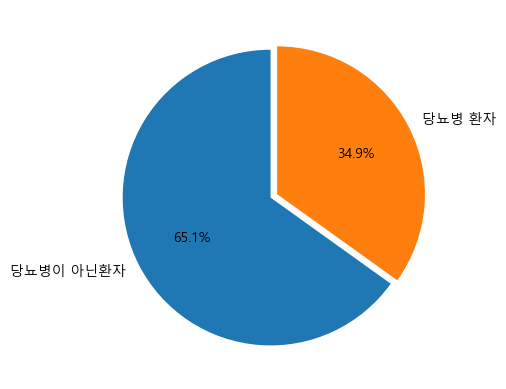

In [142]:
labels = ['당뇨병이 아닌환자','당뇨병 환자']
explode = [0.05,0]
plt.pie(values,labels=labels, counterclock=True, startangle=90, autopct='%.1f%%',explode=explode)

In [15]:
# null 값 확인
# df.isnull()

In [143]:
# df.Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [144]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6228\3686644357.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=axs[0,0]) # 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6228\3686644357.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

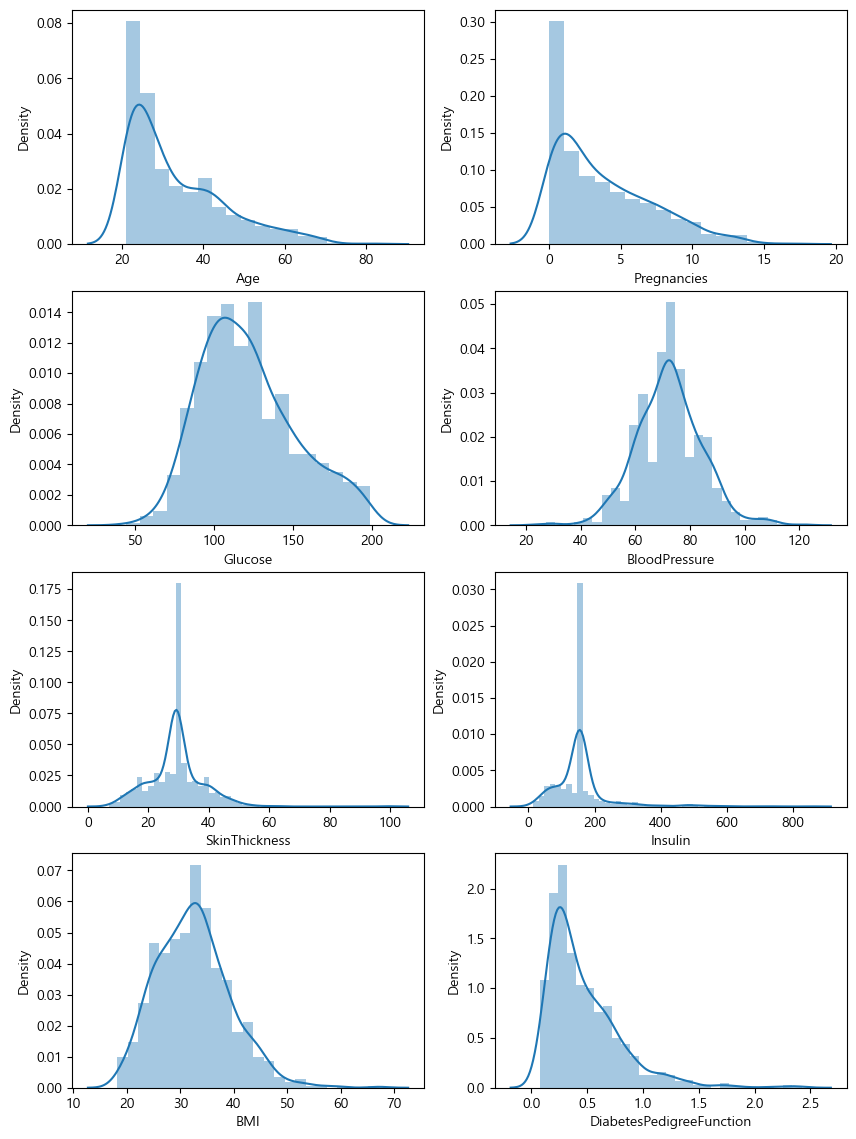

In [147]:
# 0 데이터가 있는지, 0 데이터가 어느정도 비율인지 확인
# 각 특성별 그래프를 출력
# fig, axs = plt.subplots(4,2,figsize=(10,8))
import seaborn as sns
fig, axs = plt.subplots(4,2,figsize=(10,14))
# axs[0].bar(df['Age'],df.index)
sns.distplot(df['Age'],ax=axs[0,0]) # 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
sns.distplot(df['Pregnancies'],ax=axs[0,1])
sns.distplot(df['Glucose'],ax=axs[1,0])
sns.distplot(df['BloodPressure'],ax=axs[1,1])
sns.distplot(df['SkinThickness'],ax=axs[2,0])
sns.distplot(df['Insulin'],ax=axs[2,1])
sns.distplot(df['BMI'],ax=axs[3,0])
sns.distplot(df['DiabetesPedigreeFunction'],ax=axs[3,1])
plt.show()

# 형태 하나를 가지고 값만 표기

In [148]:
# 각 특성별 영향도를 확인하는 함수
df.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<Axes: >

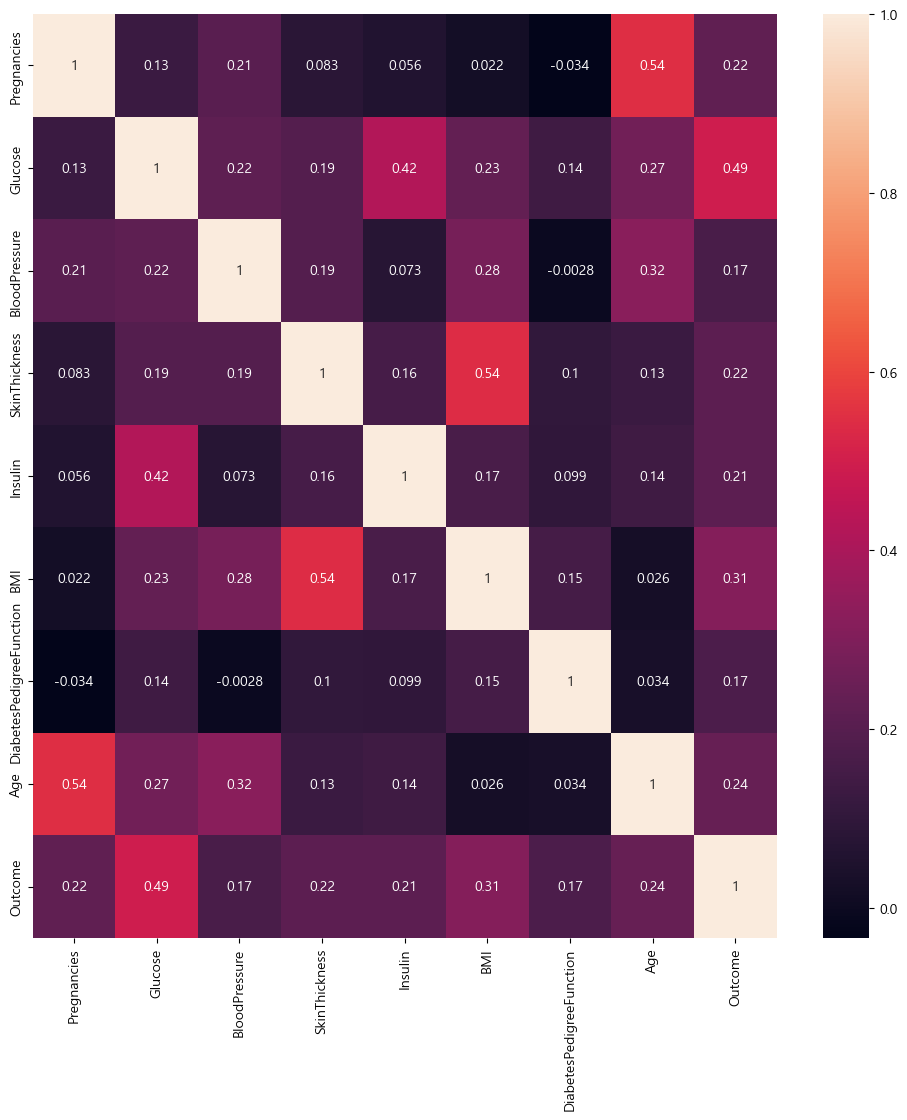

In [149]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)  # 각 특성별 영향도와 데이터 수치 출력

In [150]:
# 머신러닝
# 1. 데이터 전처리 - train, test세트 분리
results = df["Outcome"]
data = df.iloc[:,:-1]

In [151]:
train_input, test_input, train_target, test_target = train_test_split(data, results,random_state=40)
train_input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
563,6,99.0,60.000000,19.00000,54.000000,26.9,0.497,32
739,1,102.0,74.000000,29.15342,155.548223,39.5,0.293,42
554,1,84.0,64.000000,23.00000,115.000000,36.9,0.471,28
720,4,83.0,86.000000,19.00000,155.548223,29.3,0.317,34
652,5,123.0,74.000000,40.00000,77.000000,34.1,0.269,28
...,...,...,...,...,...,...,...,...
440,0,189.0,104.000000,25.00000,155.548223,34.3,0.435,41
165,6,104.0,74.000000,18.00000,156.000000,29.9,0.722,41
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29
219,5,112.0,66.000000,29.15342,155.548223,37.8,0.261,41


In [152]:
# 학습하기
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_input,train_target)

RandomForestClassifier()

In [153]:
# 예측하기
predict = rfc.predict(test_input)
predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [154]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [155]:
# 예측률
score = rfc.score(test_input,test_target)
score

0.7239583333333334

In [156]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [157]:
# 특성(피처) 중요도
rfc.feature_importances_

array([0.10038597, 0.24299472, 0.08629719, 0.07872601, 0.08295068,
       0.1557441 , 0.12937482, 0.12352651])

In [158]:
# 각 특성의 영향도를 체크해서 다른 특성으로 변경
df_import = pd.DataFrame([df.columns[:-1],rfc.feature_importances_])
df_import = df_import.T
df_import.sort_values(1,ascending=False,inplace=True)
df_import

,0,1
1,Glucose,0.242995
5,BMI,0.155744
6,DiabetesPedigreeFunction,0.129375
7,Age,0.123527
0,Pregnancies,0.100386
2,BloodPressure,0.086297
4,Insulin,0.082951
3,SkinThickness,0.078726


In [159]:
df_import[1]

1    0.242995
5    0.155744
6    0.129375
7    0.123527
0    0.100386
2    0.086297
4    0.082951
3    0.078726
Name: 1, dtype: object

<BarContainer object of 8 artists>

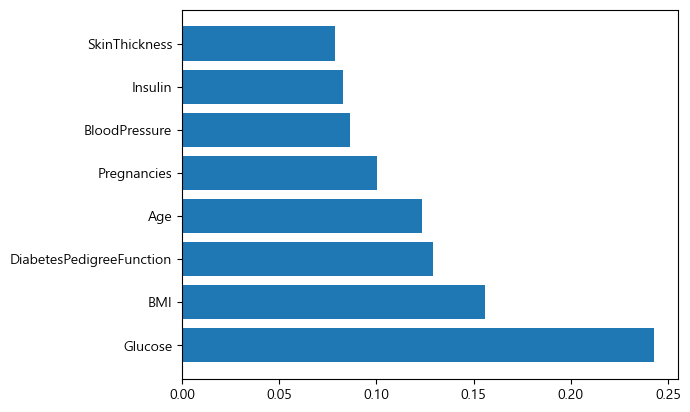

In [160]:
plt.barh(df_import[0], df_import[1])

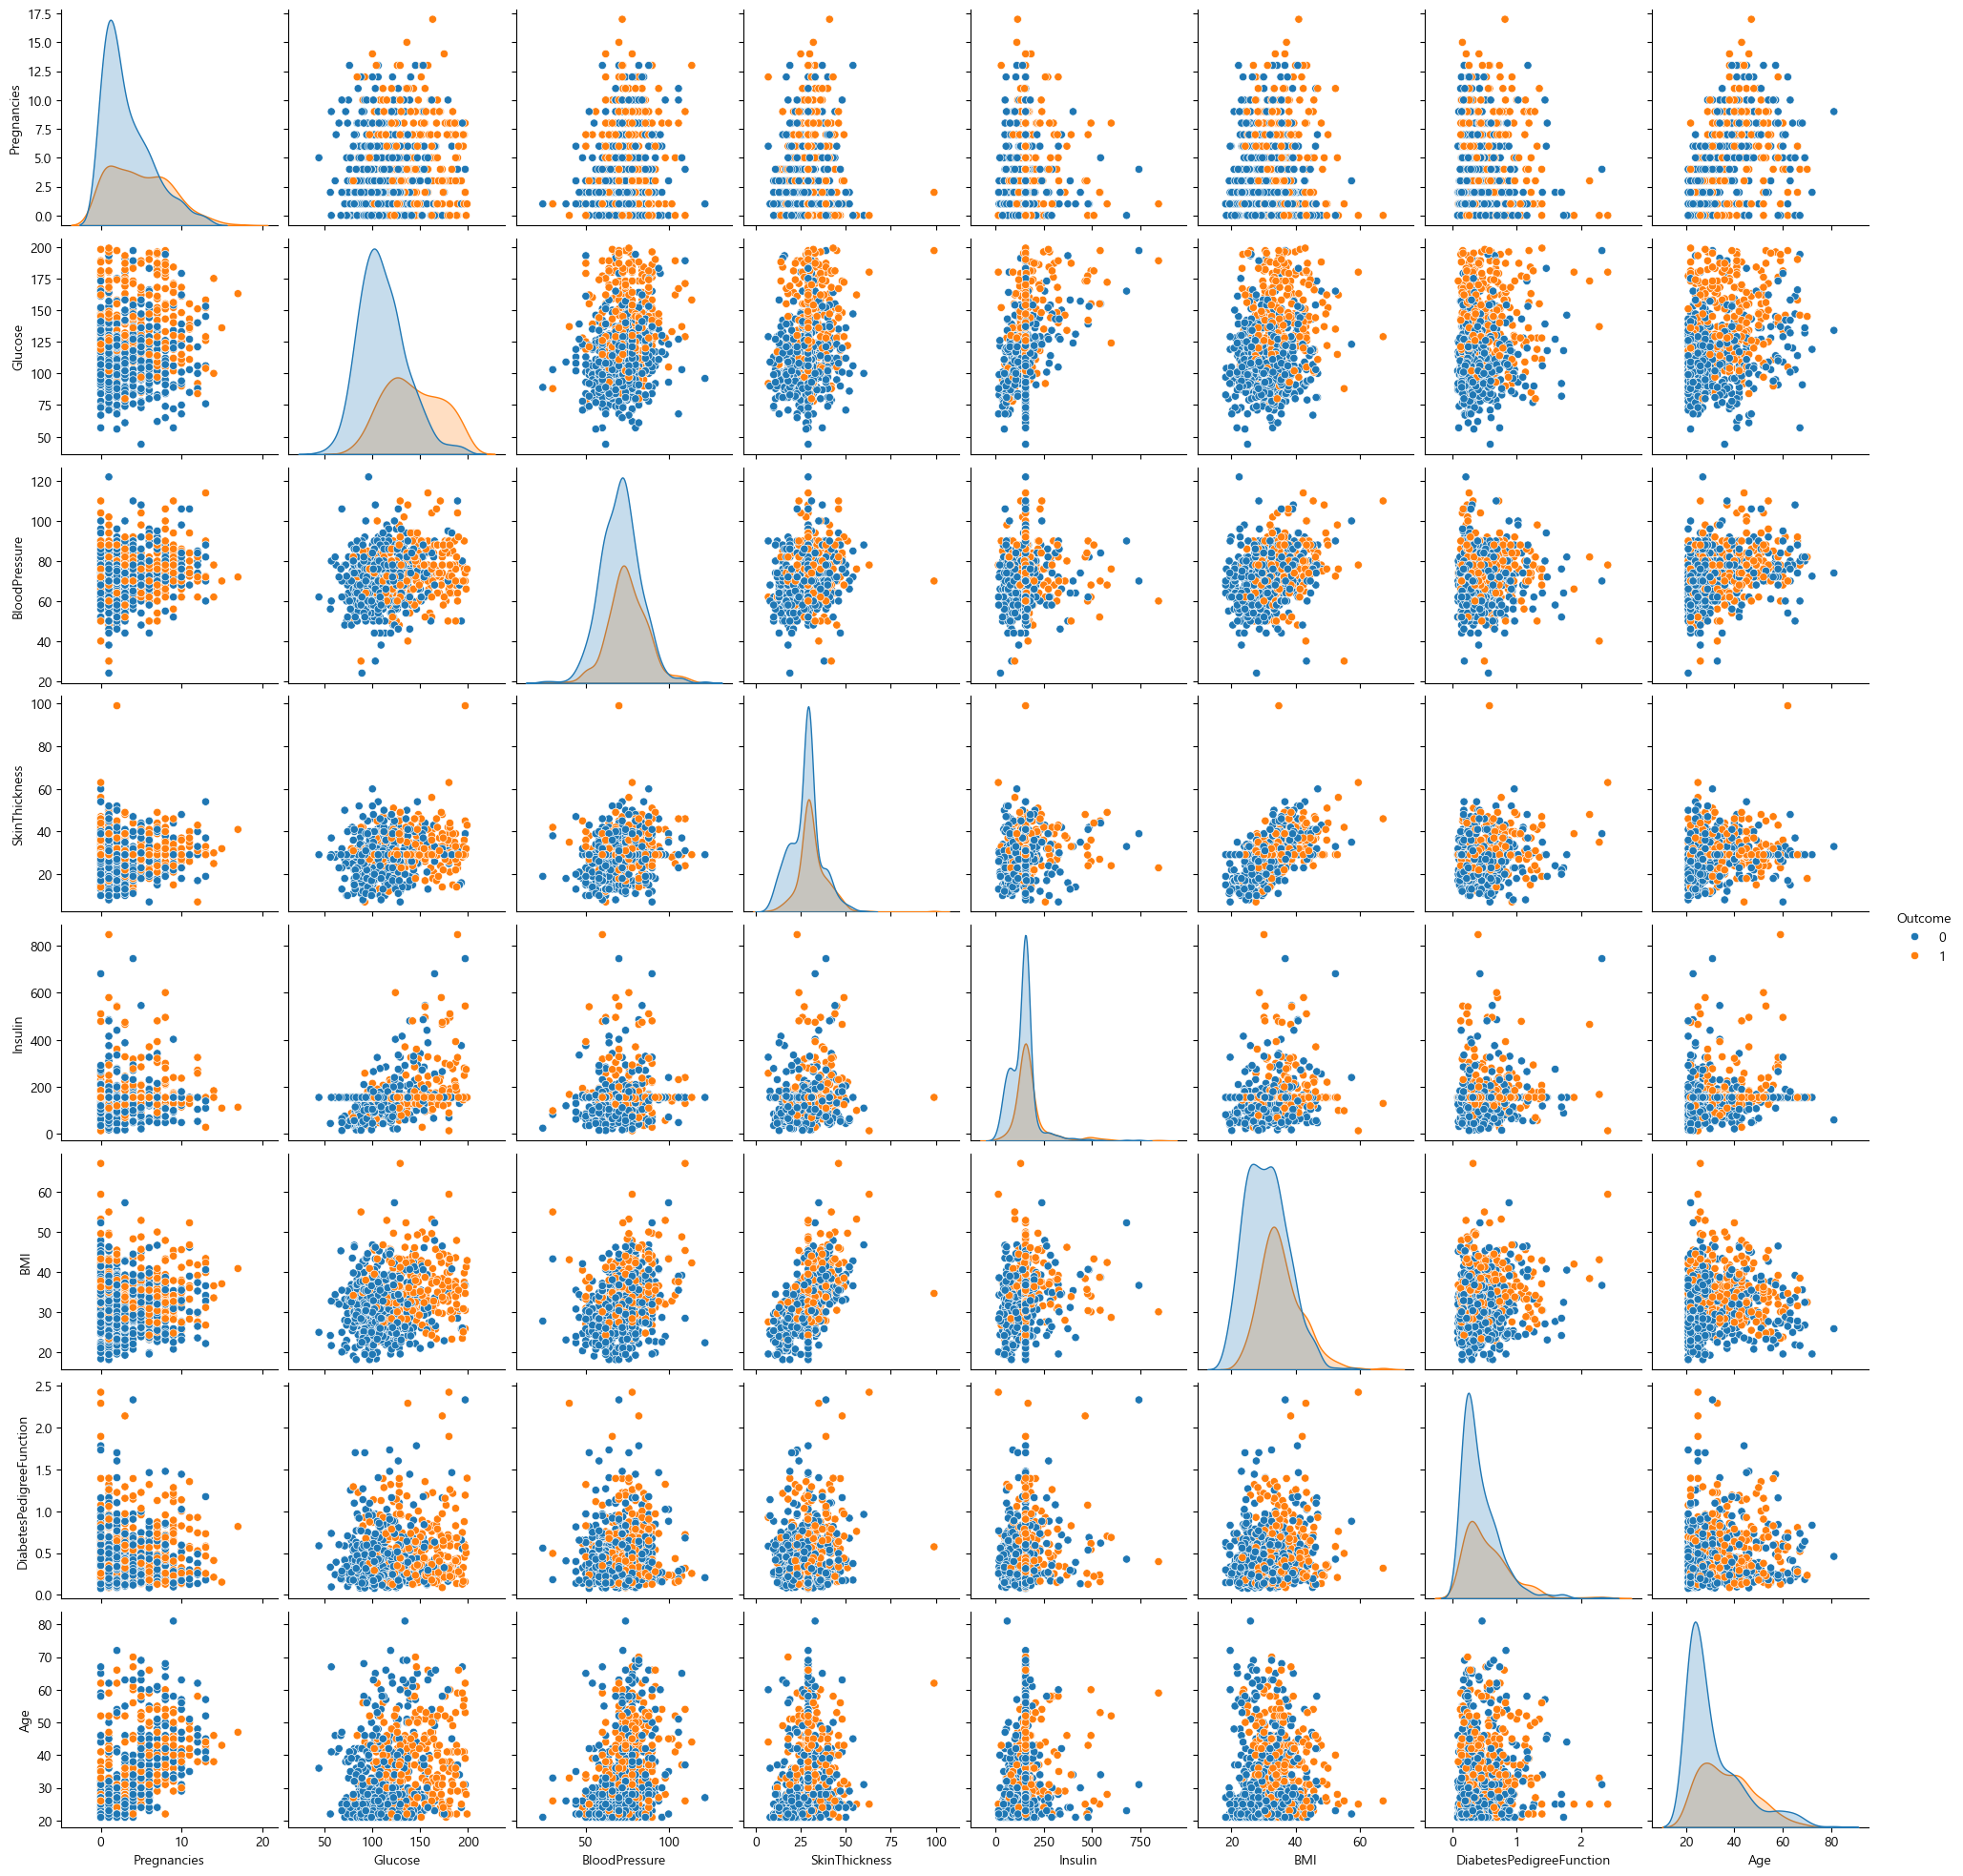

In [161]:
sns.pairplot(df,hue='Outcome')

In [162]:
df_zero_to_mean = df
df_zero_to_mean['Glucose'].mean()

121.68676277850591

In [163]:
# 각 특성별 0의 데이터 처리
# Nan -> 0으로 처리
# Nan -> 평균으로 처리
# Nan데이터 아니고, 0의 데이터여서 0 의 데이터를 Nan으로 변경


# df_zero_to_mean['Glucose'].sort_values().head(10)
# 1. 0의 데이터를 Nan으로 변경

df_zero_to_mean['Glucose'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['BloodPressure'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['SkinThickness'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['Insulin'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['BMI'].replace(0,np.NaN,inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6228\4177511636.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BMI'].replace(0,np.NaN,inplace=True)


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [165]:
df_zero_to_mean['Glucose'].fillna(df_zero_to_mean['Glucose'].mean(),inplace=True)
df_zero_to_mean['BloodPressure'].fillna(df_zero_to_mean['BloodPressure'].mean(),inplace=True)
df_zero_to_mean['SkinThickness'].fillna(df_zero_to_mean['SkinThickness'].mean(),inplace=True)
df_zero_to_mean['Insulin'].fillna(df_zero_to_mean['Insulin'].mean(),inplace=True)
df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(),inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6228\198637341.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(),inplace=True)


In [166]:
df_zero_to_mean['Glucose'].mean()

121.68676277850591

In [167]:
df_zero_to_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [171]:
df_zero_to_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [174]:
# 데이터 전처리
train_input, test_input, train_target, test_target = train_test_split(
    df_zero_to_mean.iloc[:,:-1],  df_zero_to_mean.iloc[:,-1]                                 
                                                                      )

In [175]:
# 훈련시키기
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_input,train_target)
# 예측하기
predict = rfc.predict(test_input)
print("예측값 :",predict)
# 결과값
score = rfc.score(test_input,test_target)
print("결과값 :",score)


예측값 : [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 1]
결과값 : 0.7239583333333334


In [170]:
df['Age'].sort_values().head(20)

255    21
60     21
102    21
182    21
623    21
624    21
55     21
626    21
627    21
629    21
105    21
413    21
324    21
414    21
220    21
307    21
550    21
422    21
208    21
392    21
Name: Age, dtype: int64

In [169]:
values = df['Outcome'].value_counts().values
values

array([500, 268], dtype=int64)